In [ ]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [ ]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.simple_generator as sg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [ ]:
cohort = "test2"             # cohort name

data_method = "data_gamma"        # method name
eval_method = "eval_nominal"        # method name

scene = "mid_gate"                  # scene name

courses = [                         # course names
    "bounce1",
    ]   

roster = [
    "Maverick",
    ]


In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,["bounce1"],scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

======================================================================
Cohort : test2          Network: histNet
======================================================================
----------------------------------------------------------------------
Student: Maverick   | Epochs: 100   | Data Size: 21000.0/1750.0               
Time: 0h 7m 28s     | Train: 0.8628 | Test: 0.8730
======================================================================

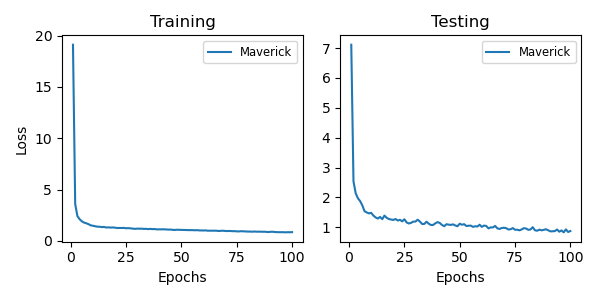

In [4]:
# # First Stage Training
# tp.train_roster(cohort,roster,"histNet",100,regen=False)

pl.plot_losses(cohort,roster,"histNet",use_log=False)

======================================================================
Cohort : test2          Network: commNet
======================================================================
----------------------------------------------------------------------
Student: Maverick   | Epochs: 200   | Data Size: 21000.0/1750.0               
Time: 1h 5m 1s      | Train: 0.0021 | Test: 0.0053 | Eval TTE: 0.55
======================================================================

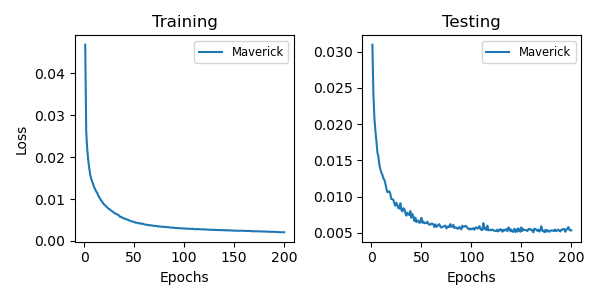

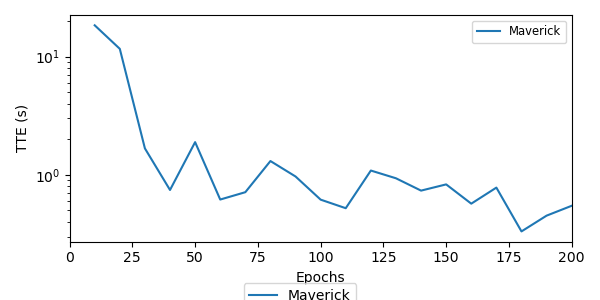

In [10]:
# # Second Stage Training
# tp.train_roster(cohort,roster,"commNet",200,regen=True,use_deploy=scene)

pl.plot_losses(cohort,roster,"commNet",use_log=False)

In [ ]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,course,scene,eval_method,roster,mode="visualize")
    pl.plot_deployments(cohort,course,roster,plot_show=True)